# Assignment 6

### GOAL
After Assignment 6, you should understand and be able to apply the following functions (in addition to the ones from previous assignments):
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

## Exercises 

***Ex1.*** Load the dataframe below and add a new column 'initialPrediction', which is estimated using the following linear equation: $predictedGrade=0.4x+8$


```python
data = pd.DataFrame([
    {'hours_of_work':6, 'grade':16},
    {'hours_of_work':7, 'grade':18},
    {'hours_of_work':5., 'grade':14},
    {'hours_of_work':9.1, 'grade':17},
    {'hours_of_work':2., 'grade':10},
    {'hours_of_work':8, 'grade':15},
    {'hours_of_work':1.3, 'grade':9},
    {'hours_of_work':2.9, 'grade':12},
])
m = 0.4
i = 8
```

In [1]:
import pandas as pd
data = pd.DataFrame([
    {'hours_of_work':6, 'grade':16},
    {'hours_of_work':7, 'grade':18},
    {'hours_of_work':5., 'grade':14},
    {'hours_of_work':9.1, 'grade':17},
    {'hours_of_work':2., 'grade':10},
    {'hours_of_work':8, 'grade':15},
    {'hours_of_work':1.3, 'grade':9},
    {'hours_of_work':2.9, 'grade':12},
])
m = 0.4
i = 8
data['initialPrediction'] = (data['hours_of_work']*m)+i

***Ex2.*** Calculate the mean squared error by hand and compare it with the one from scikit learn
$$
MSE = J(s, i) = \frac{1}{n}\Sigma_{i=1}^{n}{\Big(y_i - (s x_i + i)\Big)^2}
$$

In [2]:
from sklearn.metrics import mean_squared_error
mean_squared_error(data['grade'], data['initialPrediction']), (1/data.shape[0])*(data['grade'] - data['initialPrediction']).pow(2).sum()


(1/data.shape[0])*(data['grade'] - data['initialPrediction']).pow(2).sum()

19.013199999999998

***Ex3.*** Fit a line using the linear regression from scikit learn and store the predicted value in a column named 'scikitPrediction'. What are the slope and the intercept? (check the [doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html))

In [3]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(data[['hours_of_work']], data['grade'])
pred = model.predict(data[['hours_of_work']])
data['scikitPrediction'] =  pred
print ('According to scikit, the best slope is {} and the intercept is {}'.format(model.coef_, model.intercept_))

According to scikit, the best slope is [1.04270023] and the intercept is 8.492060053294049


***Ex4.*** Plot the observed values using a scatter plot and add two lines for the two linear regressions (ex1 and ex3)

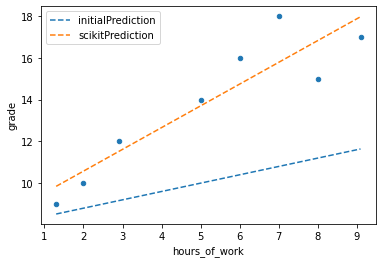

In [5]:
import pandas as pd
from matplotlib import pyplot as plt

#fig, ax = plt.subplots()
ax = data.plot.scatter(x='hours_of_work', y='grade')
data.set_index('hours_of_work').sort_index()[['initialPrediction', 'scikitPrediction']].plot.line(ax=ax, linestyle='dashed')
plt.savefig('filename.png', dpi=600)
plt.show()

***Ex5.*** Load the data listings.csv and delete the column 'property_type'

In [ ]:
listings = pd.read_csv('listings.csv')
listings = listings.drop('property_type', axis=1)

***Ex6.*** Use 20% of the observations and put them in a set called 'holdout' (using the function sample() from pandas). Please do not use them for training or choosing the best parameters (!); we will use the holdout set to estimate the performance. Set the random state to get the same sampling if you re-run the cell.

In [ ]:
holdout = listings.sample(frac=0.2, random_state=1)
training = listings.drop(holdout.index)
listings

***Ex7*** Estimate the performance (using MSE) of a baseline that always predicts the mean (learn the mean using the training data, estimate the performance using the holdout set)

In [ ]:
mean_squared_error(pd.Series(training['price'].mean()).repeat(holdout.shape[0]), holdout['price'])

In [ ]:
[training['price'].mean()]*holdout.shape[0]

In [ ]:
pd.Series(training['price'].mean())

***Ex8*** Implement a linear regression and estimate its performance.

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(training.drop('price',axis=1), training['price'])
prediction = model.predict(holdout.drop('price',axis=1))
mean_squared_error(model.predict(holdout.drop('price',axis=1)), holdout['price'])

holdout.drop('price',axis=1))

***Ex9*** Using a decision tree regressor, what would be the best max depth? Answer this question using kfold with k = 5 ***(do not use the holdout dataset)***.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, random_state=None, shuffle=False)
results = [] 
for depth in range(1,20,1):
    for training_i, testing_i in kfold.split(training):
        model = DecisionTreeRegressor(max_depth=depth)
        model.fit(training.iloc[training_i,:].drop('price',axis=1), training.iloc[training_i,:]['price'])
        mse = mean_squared_error(model.predict(training.iloc[testing_i,:].drop('price',axis=1)), training.iloc[testing_i,:]['price'])
        results.append({'depth':depth, 'mse':mse})
pd.DataFrame(results).groupby('depth').mean()

best_depth = pd.DataFrame(results).set_index('depth')['mse'].idxmin()

***Ex10*** Implement a decision tree regressor with the maximum depth found in the previous exercise and estimate its performance (using the holdout dataset).

In [ ]:
model = DecisionTreeRegressor(max_depth=best_depth)
model.fit(training.drop('price',axis=1), training['price'])
mse = mean_squared_error(model.predict(holdout.drop('price',axis=1)), holdout['price'])
print (mse)

***Ex11.*** Comparing the three regressors, which one is the best one? 
Why didn't we use the hangout set to choose the best depth with the regression tree? 

Linear regression is the best approach since it reduces the MSE the most. 

We didn't use the holdout set to tune the hyperparameter (i.e., the depth of the regression tree) because that would be 'unfair' for the other classifier. Concretely, we would pick the depth that minimizes the MSE specifically for the holdout set. However, remember, the goal is not to minimize the MSE for the holdout dataset. Instead, the goal is to build a model that performs well for unseen observations (the holdout dataset mimicked these unseen observations). 

If you are still not convinced that we cannot use the holdout set to choose the right parameter, I encourage you to read: https://machinelearningmastery.com/difference-test-validation-datasets/

In [ ]:
***Extra Exercise.*** Implement Linear trees using the following library: https://github.com/cerlymarco/linear-tree 